Common Imports for Generalization

In [1]:
import sys

from scipy.stats import bernoulli

assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Importing Meta CSV and display for checks, and Heatmap


After filtering rare classes: 1011 samples
diagnosis
basal cell carcinoma             42
blue nevus                       28
clark nevus                     399
combined nevus                   13
congenital nevus                 17
dermal nevus                     33
dermatofibroma                   20
lentigo                          24
melanoma                          1
melanoma (0.76 to 1.5 mm)        53
melanoma (in situ)               64
melanoma (less than 0.76 mm)    102
melanoma (more than 1.5 mm)      28
melanoma metastasis               4
melanosis                        16
miscellaneous                     8
recurrent nevus                   6
reed or spitz nevus              79
seborrheic keratosis             45
vascular lesion                  29
Name: count, dtype: int64


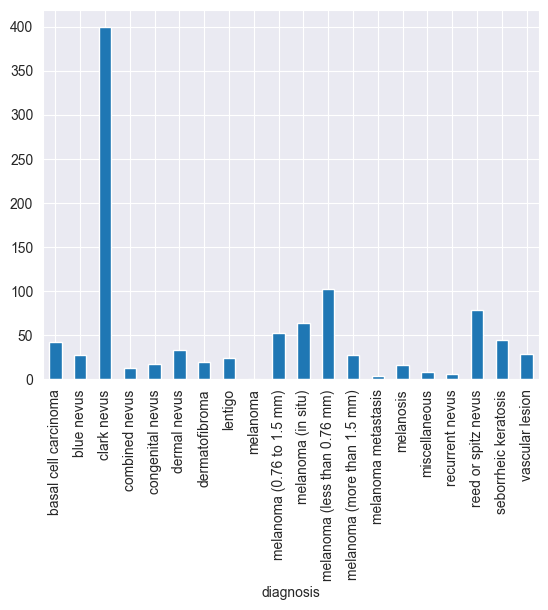

In [3]:
df = pd.read_csv('../Dataset/DERM7PT/meta/meta.csv')
print(f"\nAfter filtering rare classes: {len(df)} samples")
print(df.groupby('diagnosis')['diagnosis'].value_counts())

df.groupby('diagnosis')['diagnosis'].value_counts().plot(kind='bar')
plt.show()

In [12]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
import seaborn as sns

for column in df.columns:
    # Encoding no order categorical values as One Hot Encoder for better correlations
    if column in ['diagnosis', 'pigment_network', 'streaks', 'pigmentation', 'regression_structures', 'dots_and_globules', 'vascular_structures', 'elevation', 'location', 'management']:
        # coder = LabelEncoder()
        # columnCoder = coder.fit_transform(df[[column]])
        # df[column] = columnCoder
        df = pd.get_dummies(df, columns=[column])

    # Encoding yes or no type categories into binary mapping
    elif column in ['blue_whitish_veil']:
        df[column] = df[column].map({'present':1,'absent':0})

    elif column in ['sex']:
        df[column] = df[column].map({'male':1,'female':0})

    # Encoding ordered categorical values with Ordinal Encoding
    elif column in ['level_of_diagnostic_difficulty']:
        coder = OrdinalEncoder()
        columnCoder = coder.fit_transform(df[[column]])
        df[column] = columnCoder

new_df = df
new_df = new_df.drop(columns=['clinic','derm','case_num','case_id','notes'])
print(new_df.columns)

Index(['seven_point_score', 'blue_whitish_veil',
       'level_of_diagnostic_difficulty', 'sex',
       'diagnosis_basal cell carcinoma', 'diagnosis_blue nevus',
       'diagnosis_clark nevus', 'diagnosis_combined nevus',
       'diagnosis_congenital nevus', 'diagnosis_dermal nevus',
       'diagnosis_dermatofibroma', 'diagnosis_lentigo', 'diagnosis_melanoma',
       'diagnosis_melanoma (0.76 to 1.5 mm)', 'diagnosis_melanoma (in situ)',
       'diagnosis_melanoma (less than 0.76 mm)',
       'diagnosis_melanoma (more than 1.5 mm)',
       'diagnosis_melanoma metastasis', 'diagnosis_melanosis',
       'diagnosis_miscellaneous', 'diagnosis_recurrent nevus',
       'diagnosis_reed or spitz nevus', 'diagnosis_seborrheic keratosis',
       'diagnosis_vascular lesion', 'pigment_network_absent',
       'pigment_network_atypical', 'pigment_network_typical', 'streaks_absent',
       'streaks_irregular', 'streaks_regular', 'pigmentation_absent',
       'pigmentation_diffuse irregular', 'pigmenta

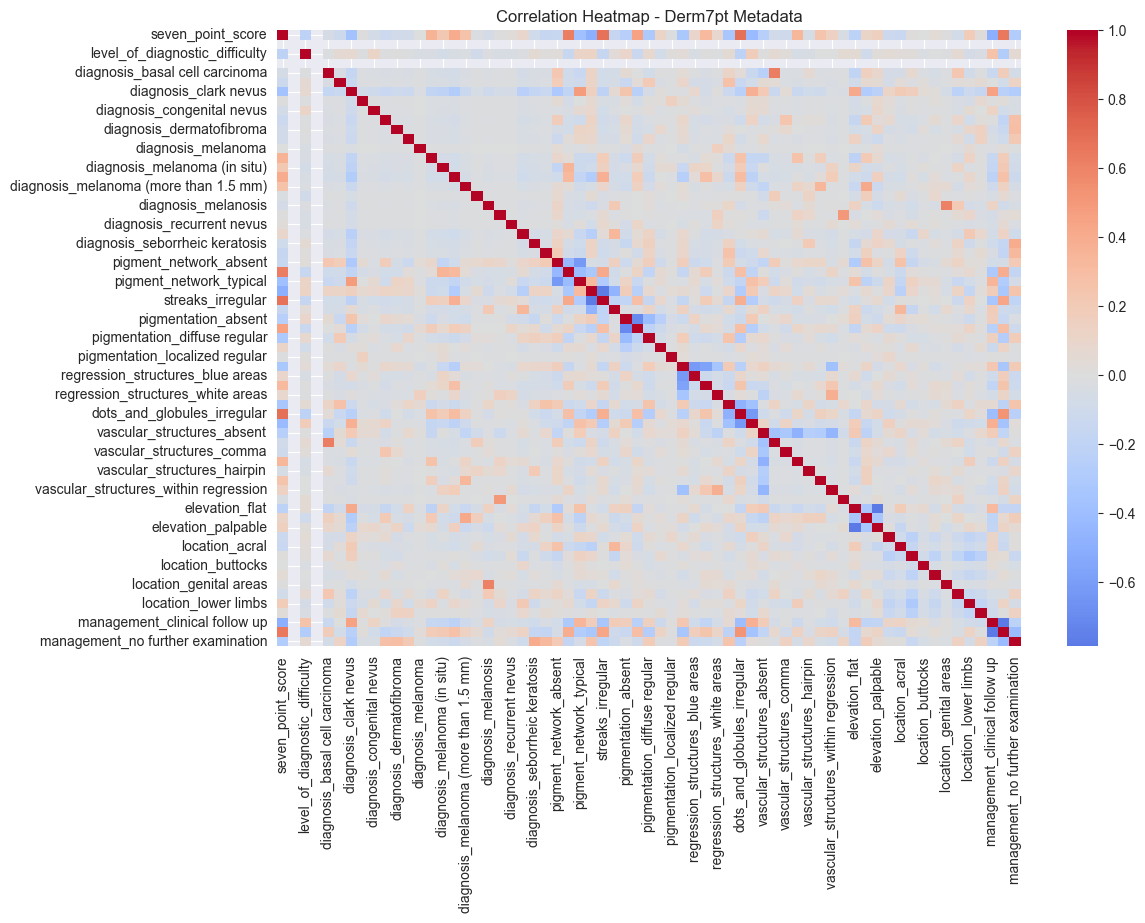

In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

corr = new_df.corr()
# print(corr)

with open("output.txt", "w") as f:
    # print(corr, file=f)
    filter = (corr > 0.2) & (corr != 1)
    result = corr[filter].stack().reset_index().rename(columns={'level_0': 'Row', 'level_1': 'Column', 0: 'Value'}).sort_values(by="Value", ascending=False).reset_index(drop=True)
    # result.columns = ['Row', 'Column','Value']
    print(result,file=f)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap - Derm7pt Metadata")
plt.show()

Preparing data for Random Forest and Results


After filtering rare classes: 1006 samples, 18 classes
diagnosis
clark nevus                     399
melanoma (less than 0.76 mm)    102
reed or spitz nevus              79
melanoma (in situ)               64
melanoma (0.76 to 1.5 mm)        53
seborrheic keratosis             45
basal cell carcinoma             42
dermal nevus                     33
vascular lesion                  29
blue nevus                       28
melanoma (more than 1.5 mm)      28
lentigo                          24
dermatofibroma                   20
congenital nevus                 17
melanosis                        16
combined nevus                   13
miscellaneous                     8
recurrent nevus                   6
Name: count, dtype: int64

Class Weights:
  basal cell carcinoma: 1.33
  blue nevus: 2.00
  clark nevus: 0.14
  combined nevus: 4.30
  congenital nevus: 3.29
  dermal nevus: 1.69
  dermatofibroma: 2.79
  lentigo: 2.33
  melanoma (0.76 to 1.5 mm): 1.05
  melanoma (in situ): 0.87
  melan

C:\Users\Prianshu Rajput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation F1 Macro: 0.4488 (+/- 0.1199)

Training Final Model...

MODEL EVALUATION
Macro F1 Score: 0.4140
Weighted F1 Score: 0.5591

Detailed Classification Report:
                              precision    recall  f1-score   support

        basal cell carcinoma       0.58      0.54      0.56        13
                  blue nevus       0.33      0.50      0.40         8
                 clark nevus       0.82      0.67      0.74       120
              combined nevus       0.29      0.50      0.36         4
            congenital nevus       0.05      0.20      0.08         5
                dermal nevus       0.50      0.50      0.50        10
              dermatofibroma       0.29      0.33      0.31         6
                     lentigo       0.62      0.71      0.67         7
   melanoma (0.76 to 1.5 mm)       0.44      0.25      0.32        16
          melanoma (in situ)       0.29      0.47      0.36        19
melanoma (less than 0.76 mm)       0.58      0.58      0.

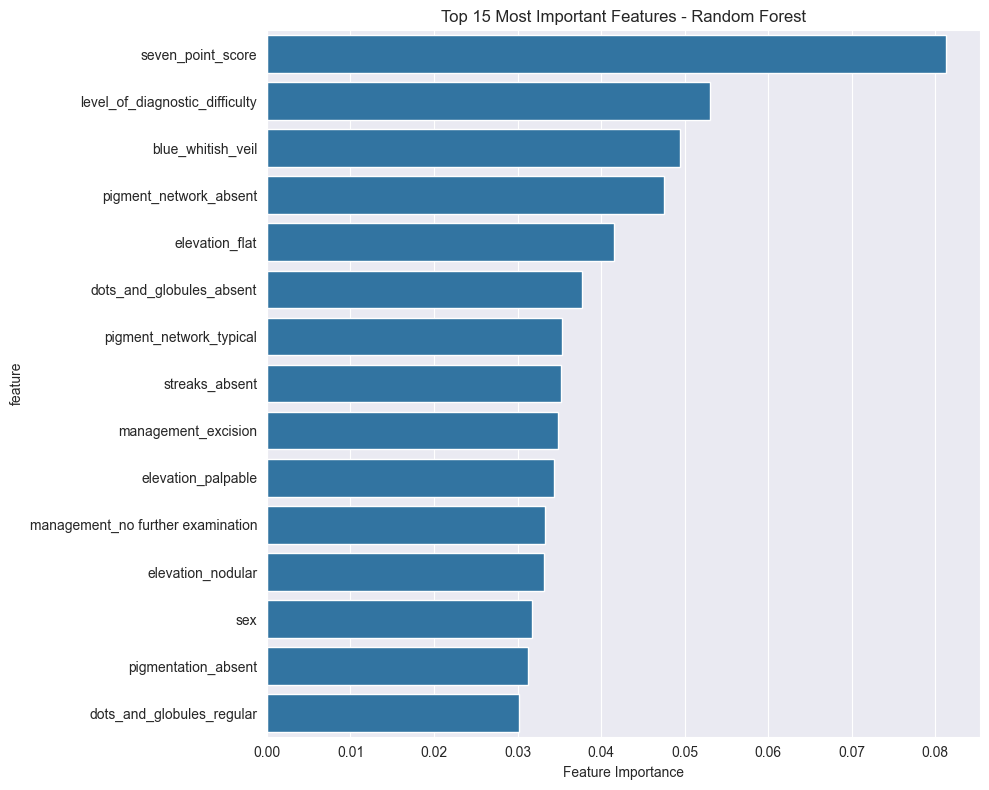

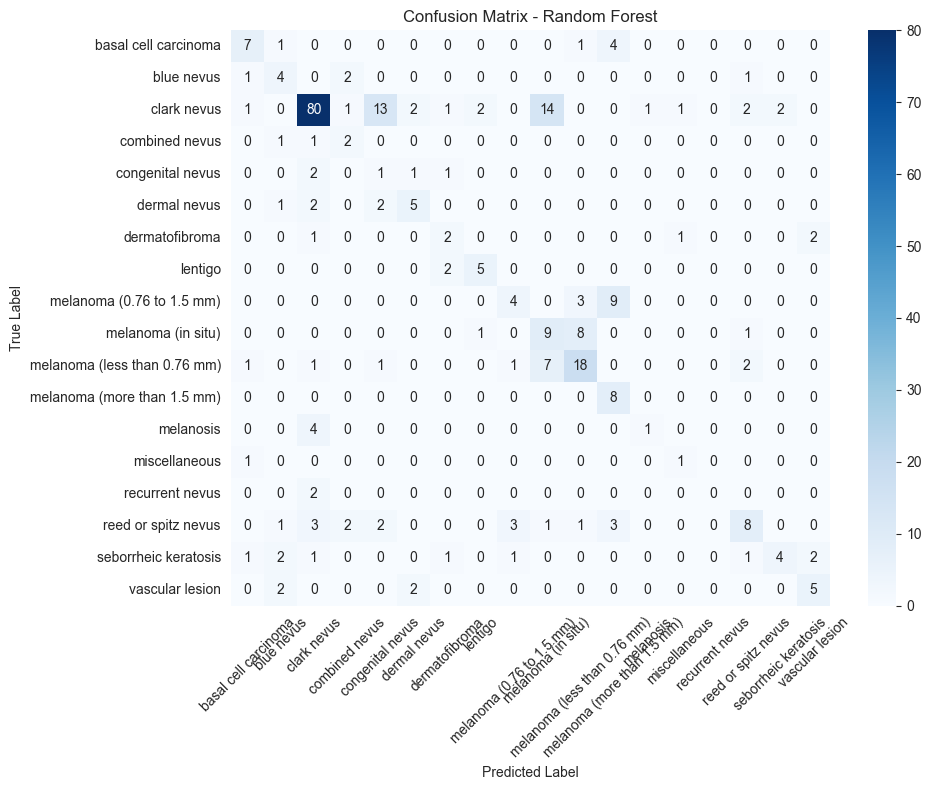


MODEL SUMMARY FOR RANDOM FOREST
Classes: 18
Features: 45
Samples: 1006
Final Test Macro F1: 0.4140


In [3]:
from sklearn.utils import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix


def prepare_for_random_forest(df):

    # 2. Remove very rare classes (recommended for better performance)
    diagnosis_counts = df['diagnosis'].value_counts()
    min_samples = 5  # Classes with fewer than 5 samples will be removed
    valid_classes = diagnosis_counts[diagnosis_counts >= min_samples].index
    df_processed = df[df['diagnosis'].isin(valid_classes)]

    print(f"\nAfter filtering rare classes: {len(df_processed)} samples, {len(valid_classes)} classes")
    print(df_processed['diagnosis'].value_counts())

    # Target remains as original strings
    y = df_processed['diagnosis']

    # Feature encoding (your existing logic)
    X_df = df_processed.drop(columns=['clinic','derm','case_num','case_id','notes', 'diagnosis'])

    for column in X_df.columns:
        if column in ['blue_whitish_veil']:
            X_df[column] = X_df[column].map({'present':1, 'absent':0})
        elif column in ['sex']:
            X_df[column] = X_df[column].map({'male':1, 'female':0})
        elif column in ['level_of_diagnostic_difficulty']:
            difficulty_map = {'low': 0, 'medium': 1, 'high': 2}
            X_df[column] = X_df[column].map(difficulty_map)
        elif X_df[column].dtype == 'object':
            X_df = pd.get_dummies(X_df, columns=[column], prefix=column)

    return X_df, y, valid_classes


def train_random_forest(X, y):

    # Calculate class weights for imbalance
    classes = np.unique(y)
    class_weights = compute_class_weight(
        'balanced',
        classes=classes,
        y=y
    )
    class_weight_dict = dict(zip(classes, class_weights))

    print("\nClass Weights:")
    for cls, weight in class_weight_dict.items():
        print(f"  {cls}: {weight:.2f}")

    # Split data with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Initialize Random Forest with optimal parameters for medical data
    rf_model = RandomForestClassifier(
        n_estimators=150,           # More trees for stability
        max_depth=20,               # Prevent overfitting
        min_samples_split=5,        # Require minimum samples to split
        min_samples_leaf=3,         # Require minimum samples in leaf
        class_weight=class_weight_dict,  # Handle class imbalance
        random_state=42,
        n_jobs=-1                   # Use all CPU cores
    )

    # Cross-validation
    print("\nPerforming Cross-Validation...")
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(rf_model, X_train, y_train,
                              cv=cv, scoring='f1_macro', n_jobs=-1)

    print(f"Cross-Validation F1 Macro: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Train final model
    print("\nTraining Final Model...")
    rf_model.fit(X_train, y_train)

    # Evaluate on test set
    y_pred = rf_model.predict(X_test)

    return rf_model, X_test, y_test, y_pred, X_train, y_train

def evaluate_model(rf_model, X_test, y_test, y_pred):

    print("\n" + "="*50)
    print("MODEL EVALUATION")
    print("="*50)

    # Key metrics
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
    f1_weighted = f1_score(y_test, y_pred, average='weighted',zero_division=0)

    print(f"Macro F1 Score: {f1_macro:.4f}")
    print(f"Weighted F1 Score: {f1_weighted:.4f}")

    # Detailed classification report
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X_test.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))

    return feature_importance, f1_macro

def plot_feature_importance(feature_importance, top_n=15):
    plt.figure(figsize=(10, 8))
    top_features = feature_importance.head(top_n)

    sns.barplot(data=top_features, y='feature', x='importance')
    plt.title(f'Top {top_n} Most Important Features - Random Forest')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(rf_model, X_test, y_test):
    y_pred = rf_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=rf_model.classes_,
                yticklabels=rf_model.classes_)
    plt.title('Confusion Matrix - Random Forest')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

fresh_df = pd.read_csv("../Dataset/DERM7PT/meta/meta.csv")
X_df, y, valid_classes = prepare_for_random_forest(fresh_df)
# print(y)
rf_model, X_test, y_test, y_pred, X_train, y_train = train_random_forest(X_df, y)
feature_importance, f1_macro = evaluate_model(rf_model, X_test, y_test, y_pred)

plot_feature_importance(feature_importance)
plot_confusion_matrix(rf_model, X_test, y_test)

# Final model summary
print("\n" + "="*50)
print("MODEL SUMMARY FOR RANDOM FOREST")
print("="*50)
print(f"Classes: {len(valid_classes)}")
print(f"Features: {X_df.shape[1]}")
print(f"Samples: {X_df.shape[0]}")
print(f"Final Test Macro F1: {f1_macro:.4f}")

# X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_df, y, test_size=0.2, random_state=42, stratify=y)
# bernoulli = BernoulliNB(alpha=1.0,binarize=None)
# bernoulli.fit(X_train_new, y_train_new)
# y_prediction_new = bernoulli.predict(X_test_new)
# print(classification_report(y_test_new, y_prediction_new, zero_division=0))


Preparing data for Naive Bayes (Bernoulli and Gaussian) and Results


After filtering rare classes: 1006 samples, 18 classes
diagnosis
clark nevus                     399
melanoma (less than 0.76 mm)    102
reed or spitz nevus              79
melanoma (in situ)               64
melanoma (0.76 to 1.5 mm)        53
seborrheic keratosis             45
basal cell carcinoma             42
dermal nevus                     33
vascular lesion                  29
blue nevus                       28
melanoma (more than 1.5 mm)      28
lentigo                          24
dermatofibroma                   20
congenital nevus                 17
melanosis                        16
combined nevus                   13
miscellaneous                     8
recurrent nevus                   6
Name: count, dtype: int64

Accuracy per fold: [0.56930693 0.60199005 0.6318408  0.5920398  0.56716418]
Mean accuracy: 0.5924683513127432
Std deviation: 0.02373936955781994

Accuracy per fold: [0.23762376 0.16915423 0.19900498 0.24378109 0.26368159]
Mean accuracy: 0.22264913058470026
St

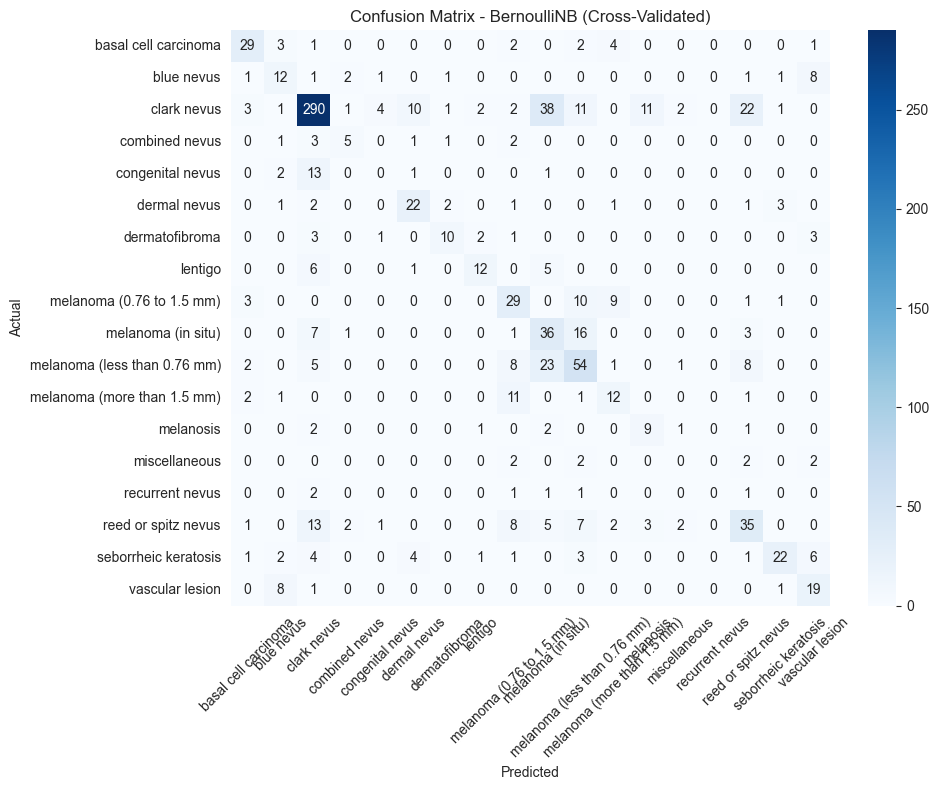

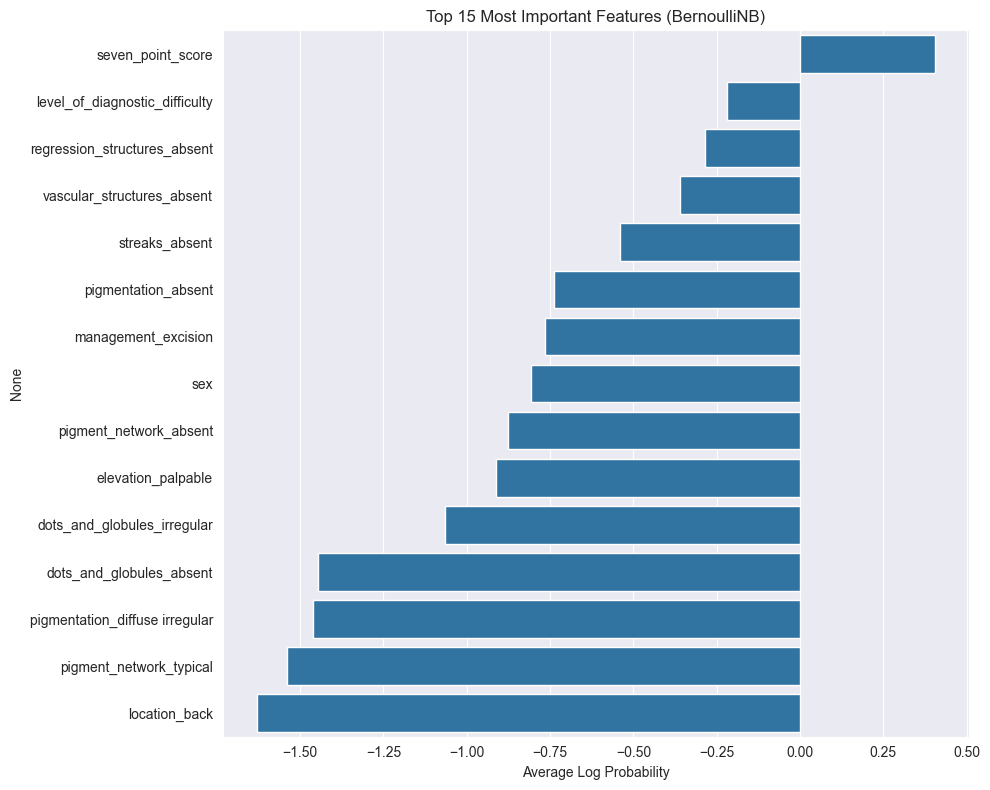

In [5]:
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import Binarizer


def prepare_for_naive_bayes(df):

    # 2. Remove very rare classes (recommended for better performance)
    diagnosis_counts = df['diagnosis'].value_counts()
    min_samples = 5  # Classes with fewer than 5 samples will be removed
    valid_classes = diagnosis_counts[diagnosis_counts >= min_samples].index
    df_processed = df[df['diagnosis'].isin(valid_classes)]

    print(f"\nAfter filtering rare classes: {len(df_processed)} samples, {len(valid_classes)} classes")
    print(df_processed['diagnosis'].value_counts())

    # Target remains as original strings
    y = df_processed['diagnosis']

    # Feature encoding (your existing logic)
    X_df = df_processed.drop(columns=['clinic','derm','case_num','case_id','notes', 'diagnosis'])

    for column in X_df.columns:
        if column in ['blue_whitish_veil']:
            X_df[column] = X_df[column].map({'present':1, 'absent':0})
        elif column in ['sex']:
            X_df[column] = X_df[column].map({'male':1, 'female':0})
        elif column in ['level_of_diagnostic_difficulty']:
            difficulty_map = {'low': 0, 'medium': 1, 'high': 2}
            X_df[column] = X_df[column].map(difficulty_map)
        elif X_df[column].dtype == 'object':
            X_df = pd.get_dummies(X_df, columns=[column], prefix=column)

    return X_df, y, valid_classes


def plot_nb_feature_importance_cv(model, X, y, top_n=15):

    # Fit on full data to extract feature_log_prob_
    model.fit(X, y)

    # Log P(feature=1 | class)
    feature_importance_df = pd.DataFrame(
        model.feature_log_prob_.T,
        index=X.columns,
        columns=[f"class_{c}" for c in model.classes_]
    )

    # Average importance across all classes
    feature_importance_df['avg_importance'] = feature_importance_df.mean(axis=1)

    # Select top N
    top_features = (
        feature_importance_df['avg_importance']
        .sort_values(ascending=False)
        .head(top_n)
    )

    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=top_features.values,
        y=top_features.index,
        orient='h'
    )
    plt.title(f"Top {top_n} Most Important Features (BernoulliNB)")
    plt.xlabel("Average Log Probability")
    plt.tight_layout()
    plt.show()

    return feature_importance_df


def plot_cv_confusion_matrix(y_true, y_pred):

    classes_new = np.unique(y)
    cm = confusion_matrix(y_true, y_pred, labels=classes_new)

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=classes_new,
        yticklabels=classes_new
    )
    plt.title("Confusion Matrix - BernoulliNB (Cross-Validated)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()



fresh_df = pd.read_csv("../Dataset/DERM7PT/meta/meta.csv")
X_df, y, valid_classes = prepare_for_naive_bayes(fresh_df)
# print(y)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_df, y, test_size=0.2, random_state=42, stratify=y)
# bernoulli = BernoulliNB(alpha=1.0,binarize=None)
# bernoulli.fit(X_train_new, y_train_new)
# y_prediction_new = bernoulli.predict(X_test_new)
# print(classification_report(y_test_new, y_prediction_new, zero_division=0))

binarizer = Binarizer(threshold=0.0)
X_bin = binarizer.fit_transform(X_df)

# --- STRATIFIED K-FOLD ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model = BernoulliNB(alpha=1.0, binarize=None)
model_gaussian = GaussianNB()

# --- CV ACCURACY SCORES ---
cv_scores = cross_val_score(model, X_bin, y, cv=skf, scoring='accuracy')
cv_scores_gaussian = cross_val_score(model_gaussian, X_bin, y, cv=skf, scoring='accuracy')

print("\nAccuracy per fold:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Std deviation:", cv_scores.std())

print("\nAccuracy per fold:", cv_scores_gaussian)
print("Mean accuracy:", cv_scores_gaussian.mean())
print("Std deviation:", cv_scores_gaussian.std())


# --- CV PREDICTIONS FOR FULL REPORT ---
y_pred_cv = cross_val_predict(model, X_bin, y, cv=skf)
y_pred_gaussian = cross_val_predict(model_gaussian, X_bin, y, cv=skf)

print("\nClassification Report For BernoulliNB:")
print(classification_report(y, y_pred_cv, zero_division=0))

print("\nClassification Report For GaussianNB:")
print(classification_report(y, y_pred_gaussian, zero_division=0))

print("\nConfusion Matrix For BernoulliNB:")
print(confusion_matrix(y, y_pred_cv))

print("\nConfusion Matrix For GaussianNB:")
print(confusion_matrix(y, y_pred_gaussian))

plot_cv_confusion_matrix(y, y_pred_cv)
feature_df = plot_nb_feature_importance_cv(model, X_df, y)

# plot_cv_confusion_matrix(y, y_pred_gaussian)
# feature_df_gaussian = plot_nb_feature_importance_cv(model_gaussian, X_df, y)



# nb_model = BernoulliNB()
# model.fit(X_train_new, y_train_new)
# y_pred = model.predict(X_test_new)
#
# feat_df, f1_macro = evaluate_nb_model(model, X_test_new, y_test_new, y_pred)
# plot_nb_feature_importance(feat_df)
# plot_nb_confusion_matrix(model, X_test_new, y_test_new)


Testing SMOTE Optimization with Random Forest, Logistic Regression and SVM and Results

Original dataset shape: (1011, 19)

Original class distribution:
diagnosis
clark nevus                     399
melanoma (less than 0.76 mm)    102
reed or spitz nevus              79
melanoma (in situ)               64
melanoma (0.76 to 1.5 mm)        53
seborrheic keratosis             45
basal cell carcinoma             42
dermal nevus                     33
vascular lesion                  29
blue nevus                       28
melanoma (more than 1.5 mm)      28
lentigo                          24
dermatofibroma                   20
congenital nevus                 17
melanosis                        16
combined nevus                   13
miscellaneous                     8
recurrent nevus                   6
melanoma metastasis               4
melanoma                          1
Name: count, dtype: int64


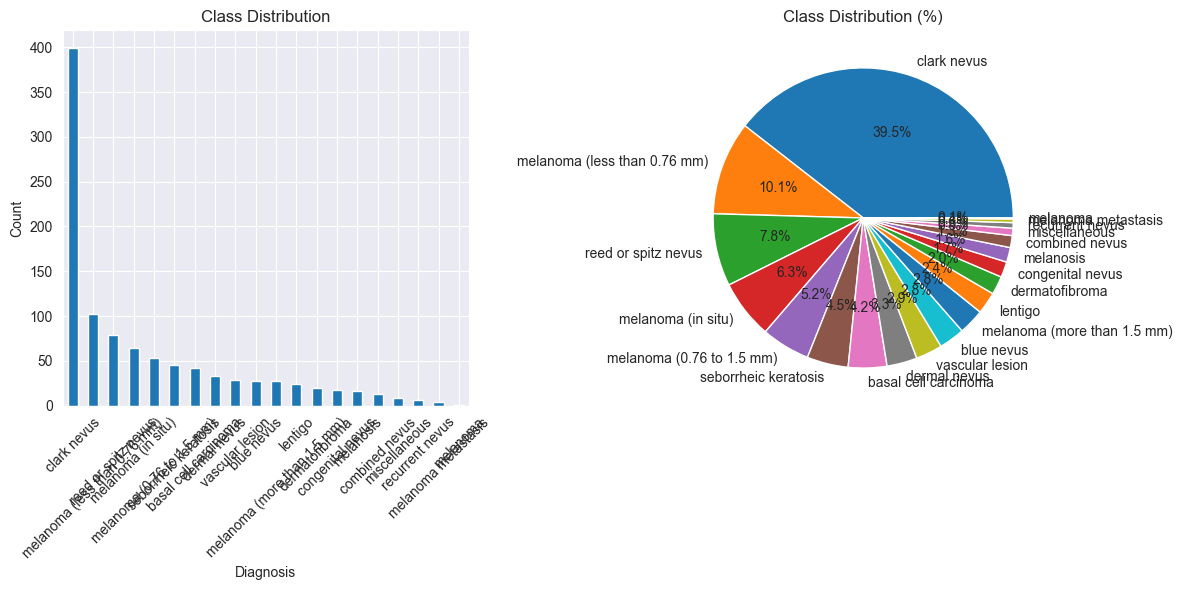

Class distribution:
  clark nevus: 399 samples
  melanoma (less than 0.76 mm): 102 samples
  reed or spitz nevus: 79 samples
  melanoma (in situ): 64 samples
  melanoma (0.76 to 1.5 mm): 53 samples
  seborrheic keratosis: 45 samples
  basal cell carcinoma: 42 samples
  dermal nevus: 33 samples
  vascular lesion: 29 samples
  blue nevus: 28 samples
  melanoma (more than 1.5 mm): 28 samples
  lentigo: 24 samples
  dermatofibroma: 20 samples
  congenital nevus: 17 samples
  melanosis: 16 samples
  combined nevus: 13 samples
  miscellaneous: 8 samples
  recurrent nevus: 6 samples
  melanoma metastasis: 4 samples
  melanoma: 1 samples
After filtering rare classes: 992 samples, 16 classes
diagnosis
clark nevus                     399
melanoma (less than 0.76 mm)    102
reed or spitz nevus              79
melanoma (in situ)               64
melanoma (0.76 to 1.5 mm)        53
seborrheic keratosis             45
basal cell carcinoma             42
dermal nevus                     33
vascular l

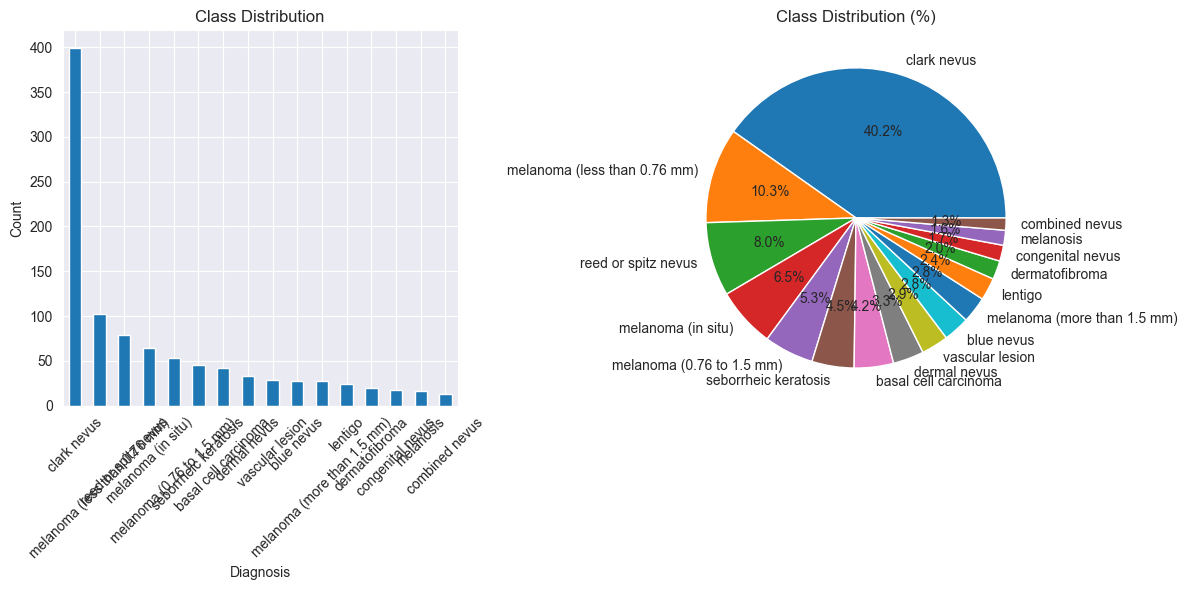

Class distribution:
  clark nevus: 399 samples
  melanoma (less than 0.76 mm): 102 samples
  reed or spitz nevus: 79 samples
  melanoma (in situ): 64 samples
  melanoma (0.76 to 1.5 mm): 53 samples
  seborrheic keratosis: 45 samples
  basal cell carcinoma: 42 samples
  dermal nevus: 33 samples
  vascular lesion: 29 samples
  blue nevus: 28 samples
  melanoma (more than 1.5 mm): 28 samples
  lentigo: 24 samples
  dermatofibroma: 20 samples
  congenital nevus: 17 samples
  melanosis: 16 samples
  combined nevus: 13 samples

After SMOTE resampling:
diagnosis
basal cell carcinoma            399
blue nevus                      399
clark nevus                     399
combined nevus                  399
congenital nevus                399
dermal nevus                    399
dermatofibroma                  399
lentigo                         399
melanoma (in situ)              399
melanoma (less than 0.76 mm)    399
melanoma (0.76 to 1.5 mm)       399
melanoma (more than 1.5 mm)     399
melano

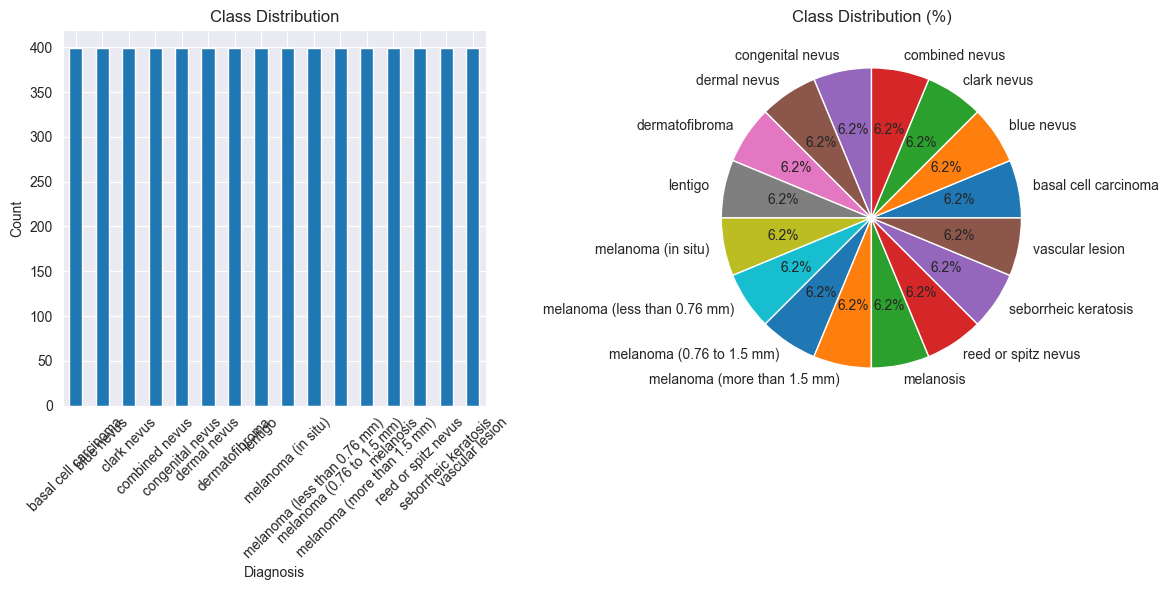

Class distribution:
  basal cell carcinoma: 399 samples
  blue nevus: 399 samples
  clark nevus: 399 samples
  combined nevus: 399 samples
  congenital nevus: 399 samples
  dermal nevus: 399 samples
  dermatofibroma: 399 samples
  lentigo: 399 samples
  melanoma (in situ): 399 samples
  melanoma (less than 0.76 mm): 399 samples
  melanoma (0.76 to 1.5 mm): 399 samples
  melanoma (more than 1.5 mm): 399 samples
  melanosis: 399 samples
  reed or spitz nevus: 399 samples
  seborrheic keratosis: 399 samples
  vascular lesion: 399 samples

SINGLE TRAIN-TEST SPLIT EVALUATION

Evaluating Random Forest

--- On Original Data ---
Accuracy: 0.6533
F1-Score: 0.6366

--- On SMOTE Data ---
Accuracy: 0.9698
F1-Score: 0.9677

Best model: SMOTE Data

Classification Report:
                              precision    recall  f1-score   support

        basal cell carcinoma       1.00      1.00      1.00         8
                  blue nevus       0.86      1.00      0.92         6
                 clar

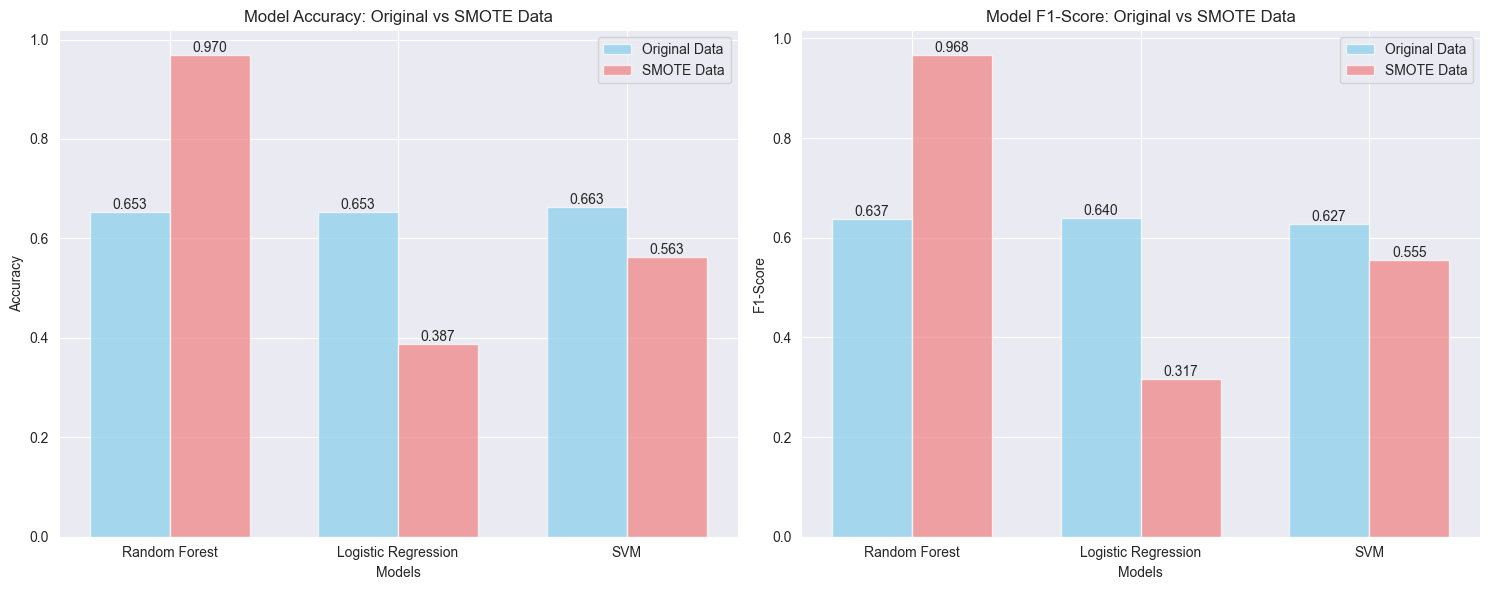


SUMMARY

Random Forest:
  Original Data - Accuracy: 0.6533, F1: 0.6366
  SMOTE Data    - Accuracy: 0.9698, F1: 0.9677
  Accuracy improvement: +0.3166
  F1-Score improvement: +0.3311
  SMOTE beneficial: YES

Logistic Regression:
  Original Data - Accuracy: 0.6533, F1: 0.6397
  SMOTE Data    - Accuracy: 0.3869, F1: 0.3174
  Accuracy improvement: -0.2663
  F1-Score improvement: -0.3223
  SMOTE beneficial: NO

SVM:
  Original Data - Accuracy: 0.6633, F1: 0.6274
  SMOTE Data    - Accuracy: 0.5628, F1: 0.5550
  Accuracy improvement: -0.1005
  F1-Score improvement: -0.0724
  SMOTE beneficial: NO

CROSS-VALIDATION SUMMARY

Random Forest:
  CV F1 Original Data: 0.6394 ± 0.0200
  CV F1 SMOTE Data:    0.9378 ± 0.0026
  CV F1 Improvement: +0.2984

Logistic Regression:
  CV F1 Original Data: 0.6322 ± 0.0213
  CV F1 SMOTE Data:    0.8418 ± 0.0040
  CV F1 Improvement: +0.2096

SVM:
  CV F1 Original Data: 0.6251 ± 0.0315
  CV F1 SMOTE Data:    0.8949 ± 0.0070
  CV F1 Improvement: +0.2698


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB, GaussianNB

def preprocess_data(df):
    # Filter rare classes - increased minimum samples to avoid SMOTE issues
    diagnosis_counts = df['diagnosis'].value_counts()
    min_samples = 10  # Increased from 5 to 10 for better SMOTE performance
    valid_classes = diagnosis_counts[diagnosis_counts >= min_samples].index
    df_processed = df[df['diagnosis'].isin(valid_classes)]

    print(f"After filtering rare classes: {len(df_processed)} samples, {len(valid_classes)} classes")
    print(df_processed['diagnosis'].value_counts())

    # Target
    y = df_processed['diagnosis']

    # Features
    X_df = df_processed.drop(columns=['clinic','derm','case_num','case_id','notes', 'diagnosis'])

    # Encoding
    for column in X_df.columns:
        if column in ['blue_whitish_veil']:
            X_df[column] = X_df[column].map({'present':1, 'absent':0})
        elif column in ['sex']:
            X_df[column] = X_df[column].map({'male':1, 'female':0})
        elif column in ['level_of_diagnostic_difficulty']:
            difficulty_map = {'low': 0, 'medium': 1, 'high': 2}
            X_df[column] = X_df[column].map(difficulty_map)
        elif X_df[column].dtype == 'object':
            X_df = pd.get_dummies(X_df, columns=[column], prefix=column)

    # Handle any NaN values that might have been introduced
    X_df = X_df.fillna(0)

    return X_df, y, valid_classes

def evaluate_models(X, y, X_smote, y_smote, test_size=0.2, random_state=42):

    # Encode labels for sklearn
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    y_smote_encoded = le.transform(y_smote)  # Use same encoder

    # Split original data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=test_size, random_state=random_state, stratify=y_encoded
    )

    # Split SMOTE data (use same test indices for fair comparison)
    X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
        X_smote, y_smote_encoded, test_size=test_size, random_state=random_state, stratify=y_smote_encoded
    )

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    scaler_smote = StandardScaler()
    X_train_smote_scaled = scaler_smote.fit_transform(X_train_smote)
    X_test_smote_scaled = scaler_smote.transform(X_test_smote)

    # Define models to test
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=random_state),
        'Logistic Regression': LogisticRegression(random_state=random_state, max_iter=1000),
        'SVM': SVC(random_state=random_state)
    }

    results = {}

    for model_name, model in models.items():
        print(f"\n{'='*50}")
        print(f"Evaluating {model_name}")
        print(f"{'='*50}")

        # On Original Data
        print("\n--- On Original Data ---")
        model_original = model
        model_original.fit(X_train_scaled, y_train)
        y_pred_original = model_original.predict(X_test_scaled)

        accuracy_original = accuracy_score(y_test, y_pred_original)
        f1_original = f1_score(y_test, y_pred_original, average='weighted', zero_division=0)

        print(f"Accuracy: {accuracy_original:.4f}")
        print(f"F1-Score: {f1_original:.4f}")

        # On SMOTE Data
        print("\n--- On SMOTE Data ---")
        model_smote = model
        model_smote.fit(X_train_smote_scaled, y_train_smote)
        y_pred_smote = model_smote.predict(X_test_scaled)  # Test on original test data

        accuracy_smote = accuracy_score(y_test, y_pred_smote)
        f1_smote = f1_score(y_test, y_pred_smote, average='weighted', zero_division=0)

        print(f"Accuracy: {accuracy_smote:.4f}")
        print(f"F1-Score: {f1_smote:.4f}")

        # Store results
        results[model_name] = {
            'Original_Data': {'accuracy': accuracy_original, 'f1': f1_original},
            'SMOTE_Data': {'accuracy': accuracy_smote, 'f1': f1_smote}
        }

        # Detailed classification report for the best model
        if f1_smote > f1_original:
            best_predictions = y_pred_smote
            best_model_type = "SMOTE Data"
        else:
            best_predictions = y_pred_original
            best_model_type = "Original Data"

        print(f"\nBest model: {best_model_type}")
        print("\nClassification Report:")
        print(classification_report(y_test, best_predictions, target_names=le.classes_, zero_division=0))

    return results, le.classes_

def cross_validation_comparison(X, y, X_smote, y_smote, n_splits=5):
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    y_smote_encoded = le.transform(y_smote)

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    scaler_smote = StandardScaler()
    X_smote_scaled = scaler_smote.fit_transform(X_smote)

    # Custom scoring function that handles zero_division
    from sklearn.metrics import make_scorer
    f1_scorer = make_scorer(f1_score, average='weighted', zero_division=0)

    # Models to evaluate
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'SVM': SVC(random_state=42)
    }

    cv_results = {}
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    for model_name, model in models.items():
        print(f"\n{model_name} Cross-Validation Results:")

        # On Original Data
        scores_original = cross_val_score(model, X_scaled, y_encoded, cv=skf, scoring=f1_scorer)

        # On SMOTE Data
        scores_smote = cross_val_score(model, X_smote_scaled, y_smote_encoded, cv=skf, scoring=f1_scorer)

        cv_results[model_name] = {
            'Original_Data': {
                'mean_f1': np.mean(scores_original),
                'std_f1': np.std(scores_original)
            },
            'SMOTE_Data': {
                'mean_f1': np.mean(scores_smote),
                'std_f1': np.std(scores_smote)
            }
        }

        print(f"  Original Data: {np.mean(scores_original):.4f} ± {np.std(scores_original):.4f}")
        print(f"  SMOTE Data:    {np.mean(scores_smote):.4f} ± {np.std(scores_smote):.4f}")

    return cv_results

def plot_comparison(results):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    models = list(results.keys())
    original_acc = [results[model]['Original_Data']['accuracy'] for model in models]
    smote_acc = [results[model]['SMOTE_Data']['accuracy'] for model in models]
    original_f1 = [results[model]['Original_Data']['f1'] for model in models]
    smote_f1 = [results[model]['SMOTE_Data']['f1'] for model in models]

    x = np.arange(len(models))
    width = 0.35

    # Accuracy plot
    bars1 = ax1.bar(x - width/2, original_acc, width, label='Original Data', alpha=0.7, color='skyblue')
    bars2 = ax1.bar(x + width/2, smote_acc, width, label='SMOTE Data', alpha=0.7, color='lightcoral')
    ax1.set_xlabel('Models')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Model Accuracy: Original vs SMOTE Data')
    ax1.set_xticks(x)
    ax1.set_xticklabels(models)
    ax1.legend()

    # Add value labels on bars
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom')

    # F1-Score plot
    bars3 = ax2.bar(x - width/2, original_f1, width, label='Original Data', alpha=0.7, color='skyblue')
    bars4 = ax2.bar(x + width/2, smote_f1, width, label='SMOTE Data', alpha=0.7, color='lightcoral')
    ax2.set_xlabel('Models')
    ax2.set_ylabel('F1-Score')
    ax2.set_title('Model F1-Score: Original vs SMOTE Data')
    ax2.set_xticks(x)
    ax2.set_xticklabels(models)
    ax2.legend()

    # Add value labels on bars
    for bar in bars3 + bars4:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

def analyze_class_distribution(y):
    class_counts = pd.Series(y).value_counts()

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    class_counts.plot(kind='bar')
    plt.title('Class Distribution')
    plt.xlabel('Diagnosis')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')
    plt.title('Class Distribution (%)')

    plt.tight_layout()
    plt.show()

    print("Class distribution:")
    for class_name, count in class_counts.items():
        print(f"  {class_name}: {count} samples")

    return class_counts

if __name__ == "__main__":
    # Loading data
    df = pd.read_csv('../Dataset/DERM7PT/meta/meta.csv')

    print("Original dataset shape:", df.shape)
    print("\nOriginal class distribution:")
    print(df['diagnosis'].value_counts())

    # Analyze original class distribution
    analyze_class_distribution(df['diagnosis'])

    # Preprocess data
    X, y, classes = preprocess_data(df)

    print(f"\nProcessed features shape: {X.shape}")
    print(f"Number of features: {X.shape[1]}")

    # Analyze processed class distribution
    analyze_class_distribution(y)

    # Apply SMOTE
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    x_new, y_new = smote.fit_resample(X, y)

    print("\nAfter SMOTE resampling:")
    print(y_new.value_counts())

    print("\nDiagnosis after SMOTE resampling:")
    x_new.to_csv("sampling.csv", index=False)

    # Analyze SMOTE class distribution
    analyze_class_distribution(y_new)

    # Single train-test split evaluation
    print("\n" + "="*60)
    print("SINGLE TRAIN-TEST SPLIT EVALUATION")
    print("="*60)
    results, class_names = evaluate_models(X, y, x_new, y_new)

    # Cross-validation evaluation (more robust)
    print("\n" + "="*60)
    print("CROSS-VALIDATION EVALUATION")
    print("="*60)
    cv_results = cross_validation_comparison(X, y, x_new, y_new)

    # Plot results
    plot_comparison(results)

    # Summary
    print("\n" + "="*60)
    print("SUMMARY")
    print("="*60)

    for model_name in results.keys():
        original_acc = results[model_name]['Original_Data']['accuracy']
        smote_acc = results[model_name]['SMOTE_Data']['accuracy']
        original_f1 = results[model_name]['Original_Data']['f1']
        smote_f1 = results[model_name]['SMOTE_Data']['f1']

        acc_improvement = smote_acc - original_acc
        f1_improvement = smote_f1 - original_f1

        print(f"\n{model_name}:")
        print(f"  Original Data - Accuracy: {original_acc:.4f}, F1: {original_f1:.4f}")
        print(f"  SMOTE Data    - Accuracy: {smote_acc:.4f}, F1: {smote_f1:.4f}")
        print(f"  Accuracy improvement: {acc_improvement:+.4f}")
        print(f"  F1-Score improvement: {f1_improvement:+.4f}")
        print(f"  SMOTE beneficial: {'YES' if f1_improvement > 0 else 'NO'}")

    # Cross-validation summary
    print("\n" + "="*60)
    print("CROSS-VALIDATION SUMMARY")
    print("="*60)
    for model_name in cv_results.keys():
        original_mean = cv_results[model_name]['Original_Data']['mean_f1']
        smote_mean = cv_results[model_name]['SMOTE_Data']['mean_f1']
        improvement = smote_mean - original_mean

        print(f"\n{model_name}:")
        print(f"  CV F1 Original Data: {original_mean:.4f} ± {cv_results[model_name]['Original_Data']['std_f1']:.4f}")
        print(f"  CV F1 SMOTE Data:    {smote_mean:.4f} ± {cv_results[model_name]['SMOTE_Data']['std_f1']:.4f}")
        print(f"  CV F1 Improvement: {improvement:+.4f}")

Modified SMOTE code to use for KNN Classifier and Results

KNN MODEL ANALYSIS - WITHOUT SMOTE
Original dataset shape: (1011, 19)

Original class distribution:
diagnosis
clark nevus                     399
melanoma (less than 0.76 mm)    102
reed or spitz nevus              79
melanoma (in situ)               64
melanoma (0.76 to 1.5 mm)        53
seborrheic keratosis             45
basal cell carcinoma             42
dermal nevus                     33
vascular lesion                  29
blue nevus                       28
melanoma (more than 1.5 mm)      28
lentigo                          24
dermatofibroma                   20
congenital nevus                 17
melanosis                        16
combined nevus                   13
miscellaneous                     8
recurrent nevus                   6
melanoma metastasis               4
melanoma                          1
Name: count, dtype: int64


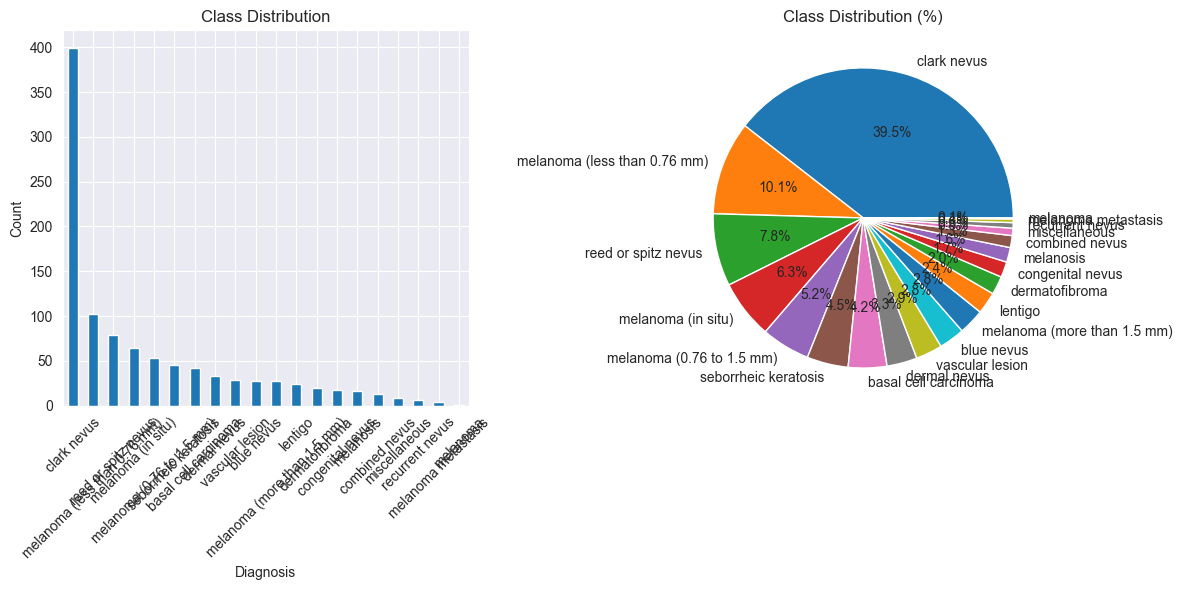

Class distribution:
  clark nevus: 399 samples
  melanoma (less than 0.76 mm): 102 samples
  reed or spitz nevus: 79 samples
  melanoma (in situ): 64 samples
  melanoma (0.76 to 1.5 mm): 53 samples
  seborrheic keratosis: 45 samples
  basal cell carcinoma: 42 samples
  dermal nevus: 33 samples
  vascular lesion: 29 samples
  blue nevus: 28 samples
  melanoma (more than 1.5 mm): 28 samples
  lentigo: 24 samples
  dermatofibroma: 20 samples
  congenital nevus: 17 samples
  melanosis: 16 samples
  combined nevus: 13 samples
  miscellaneous: 8 samples
  recurrent nevus: 6 samples
  melanoma metastasis: 4 samples
  melanoma: 1 samples
After filtering rare classes: 992 samples, 16 classes
diagnosis
clark nevus                     399
melanoma (less than 0.76 mm)    102
reed or spitz nevus              79
melanoma (in situ)               64
melanoma (0.76 to 1.5 mm)        53
seborrheic keratosis             45
basal cell carcinoma             42
dermal nevus                     33
vascular l

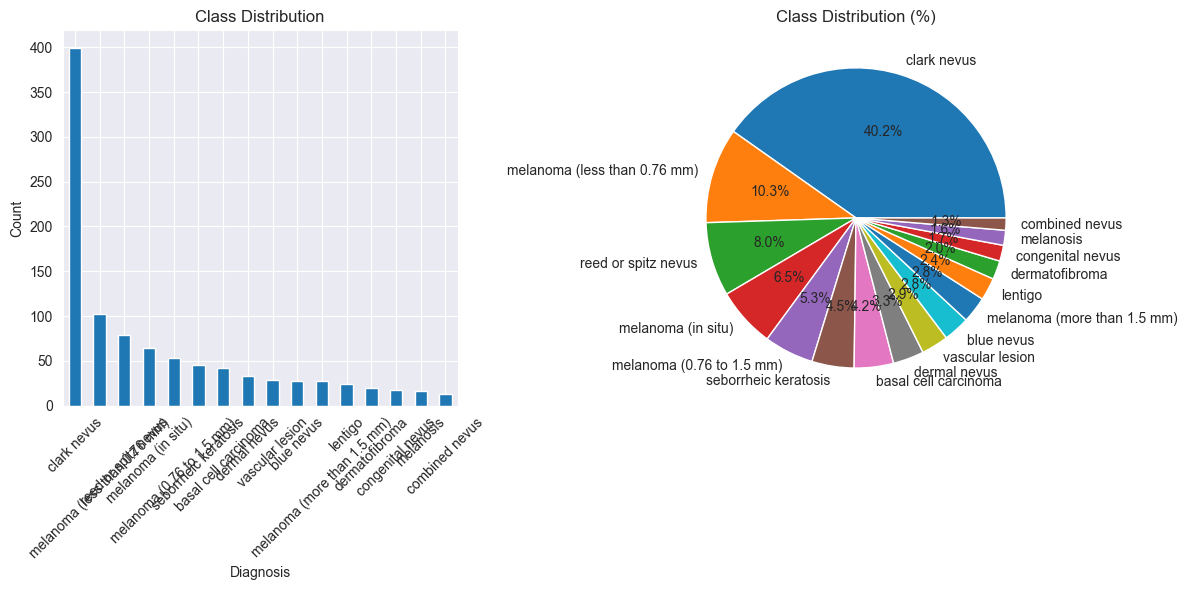

Class distribution:
  clark nevus: 399 samples
  melanoma (less than 0.76 mm): 102 samples
  reed or spitz nevus: 79 samples
  melanoma (in situ): 64 samples
  melanoma (0.76 to 1.5 mm): 53 samples
  seborrheic keratosis: 45 samples
  basal cell carcinoma: 42 samples
  dermal nevus: 33 samples
  vascular lesion: 29 samples
  blue nevus: 28 samples
  melanoma (more than 1.5 mm): 28 samples
  lentigo: 24 samples
  dermatofibroma: 20 samples
  congenital nevus: 17 samples
  melanosis: 16 samples
  combined nevus: 13 samples

KNN PERFORMANCE ACROSS DIFFERENT K VALUES


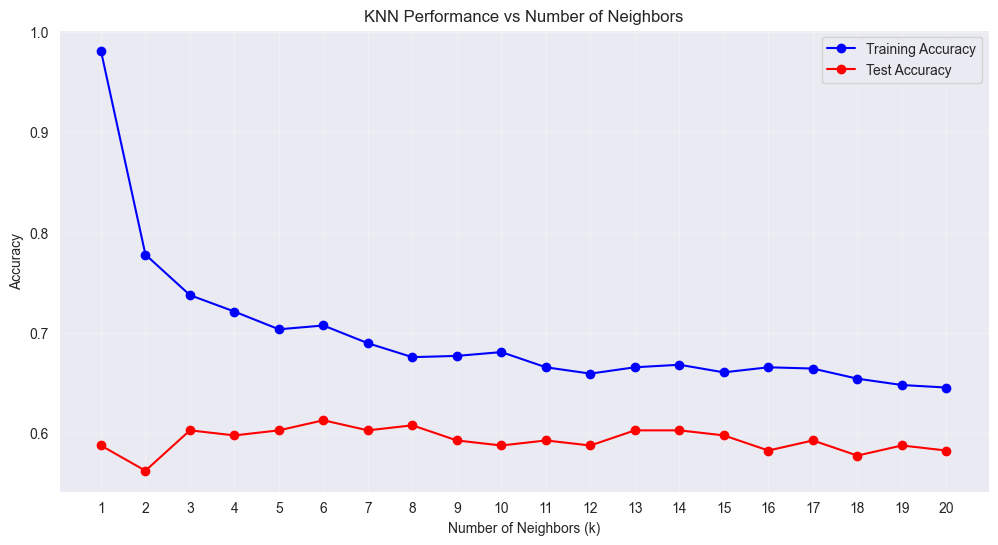

Optimal k value: 6 with test accuracy: 0.6131

KNN MODEL EVALUATION WITH HYPERPARAMETER TUNING
K-NEAREST NEIGHBORS (KNN) MODEL EVALUATION

--- Hyperparameter Tuning ---
Best parameters: {'n_neighbors': 8}
Best cross-validation score: 0.5610

--- Test Set Performance ---
Accuracy: 0.6080
Precision: 0.5918
Recall: 0.6080
F1-Score: 0.5763

--- Detailed Classification Report ---
                              precision    recall  f1-score   support

        basal cell carcinoma       0.57      0.50      0.53         8
                  blue nevus       0.14      0.17      0.15         6
                 clark nevus       0.72      0.96      0.82        80
              combined nevus       1.00      0.50      0.67         2
            congenital nevus       0.00      0.00      0.00         3
                dermal nevus       0.60      0.43      0.50         7
              dermatofibroma       1.00      0.50      0.67         4
                     lentigo       0.80      0.80      0.80  

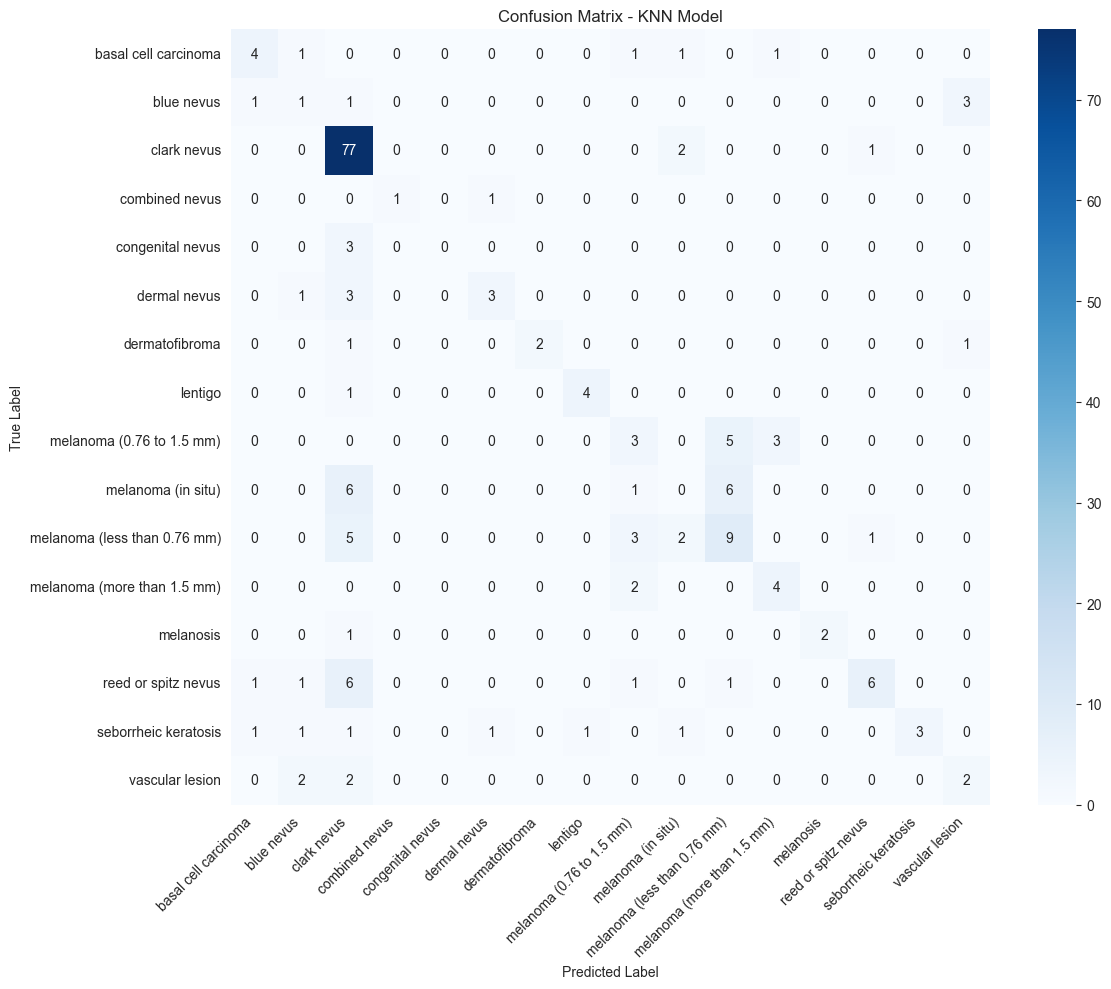


FEATURE IMPORTANCE ANALYSIS


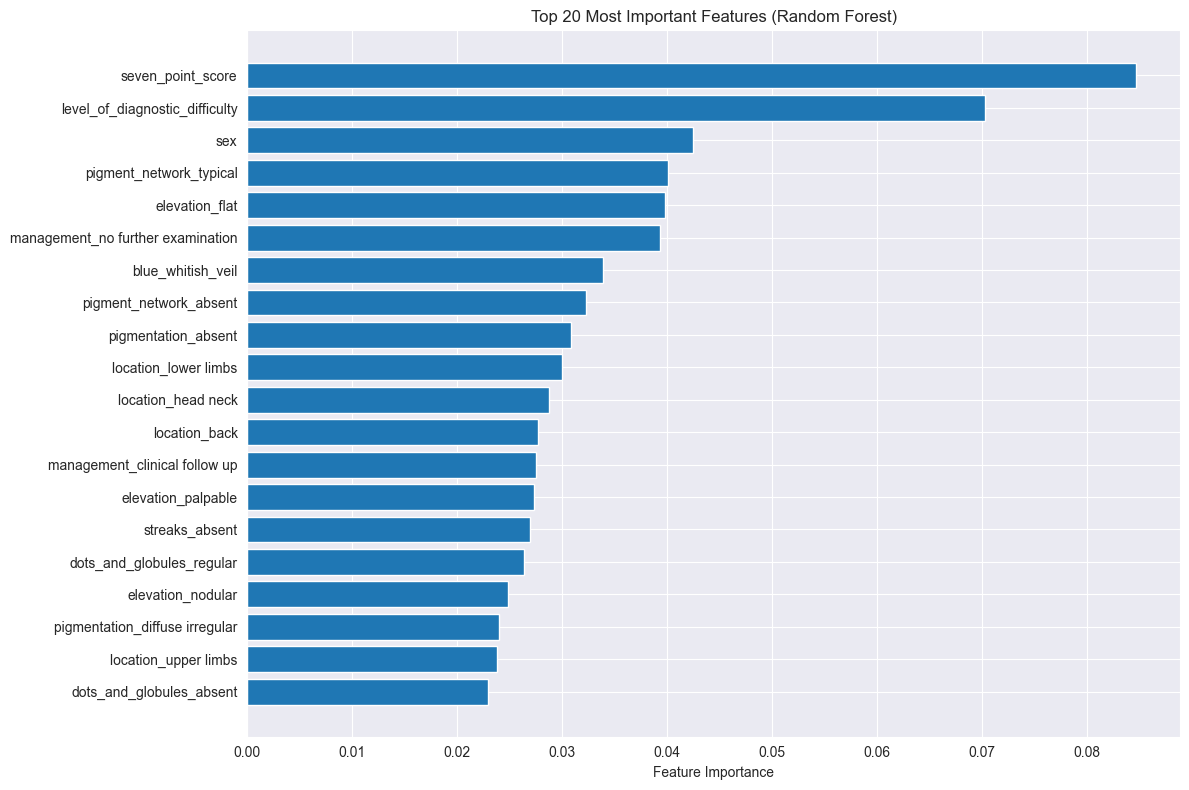


FINAL SUMMARY - KNN MODEL
Best Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}

Performance Metrics:
  Accuracy:  0.6080
  Precision: 0.5918
  Recall:    0.6080
  F1-Score:  0.5763

Class-wise Performance:
  basal cell carcinoma: 0.500 (4/8)
  blue nevus: 0.167 (1/6)
  clark nevus: 0.963 (77/80)
  combined nevus: 0.500 (1/2)
  congenital nevus: 0.000 (0/3)
  dermal nevus: 0.429 (3/7)
  dermatofibroma: 0.500 (2/4)
  lentigo: 0.800 (4/5)
  melanoma (0.76 to 1.5 mm): 0.273 (3/11)
  melanoma (in situ): 0.000 (0/13)
  melanoma (less than 0.76 mm): 0.450 (9/20)
  melanoma (more than 1.5 mm): 0.667 (4/6)
  melanosis: 0.667 (2/3)
  reed or spitz nevus: 0.375 (6/16)
  seborrheic keratosis: 0.333 (3/9)
  vascular lesion: 0.333 (2/6)

Dataset Characteristics:
  Total samples: 992
  Number of features: 71
  Number of classes: 16
  Class imbalance ratio: 30.69:1


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

def preprocess_data(df):
    # Filter rare classes
    diagnosis_counts = df['diagnosis'].value_counts()
    min_samples = 10
    valid_classes = diagnosis_counts[diagnosis_counts >= min_samples].index
    df_processed = df[df['diagnosis'].isin(valid_classes)]

    print(f"After filtering rare classes: {len(df_processed)} samples, {len(valid_classes)} classes")
    print(df_processed['diagnosis'].value_counts())

    # Target
    y = df_processed['diagnosis']

    # Features
    X_df = df_processed.drop(columns=['clinic','derm','case_num','notes', 'diagnosis'])

    # Encoding
    for column in X_df.columns:
        if column in ['blue_whitish_veil']:
            X_df[column] = X_df[column].map({'present':1, 'absent':0})
        elif column in ['sex']:
            X_df[column] = X_df[column].map({'male':1, 'female':0})
        elif column in ['level_of_diagnostic_difficulty']:
            difficulty_map = {'low': 0, 'medium': 1, 'high': 2}
            X_df[column] = X_df[column].map(difficulty_map)
        elif X_df[column].dtype == 'object':
            X_df = pd.get_dummies(X_df, columns=[column], prefix=column)

    # Handle any NaN values that might have been introduced
    X_df = X_df.fillna(0)

    return X_df, y, valid_classes

def evaluate_knn(X, y, test_size=0.2, random_state=42):

    # Encode labels for sklearn
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=test_size, random_state=random_state, stratify=y_encoded
    )

    # Scale features (important for KNN)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("="*60)
    print("K-NEAREST NEIGHBORS (KNN) MODEL EVALUATION")
    print("="*60)

    # Hyperparameter tuning for K
    print("\n--- Hyperparameter Tuning ---")
    param_grid = {'n_neighbors': [3, 4, 5, 6, 7, 8, 9]}
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    # Train with best parameters
    best_knn = grid_search.best_estimator_
    y_pred = best_knn.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"\n--- Test Set Performance ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Detailed classification report
    print(f"\n--- Detailed Classification Report ---")
    print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))

    # Cross-validation with best model
    print(f"\n--- Cross-Validation Results (5-fold) ---")
    cv_scores = cross_val_score(best_knn, X_train_scaled, y_train, cv=5, scoring='f1_weighted')
    print(f"CV F1-Scores: {cv_scores}")
    print(f"Mean CV F1-Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

    return best_knn, y_test, y_pred, le.classes_, accuracy, f1, precision, recall

def plot_confusion_matrix(y_test, y_pred, class_names):
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix - KNN Model')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def plot_knn_performance(X, y):

    # Encode labels
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Test different k values
    k_values = range(1, 21)
    train_scores = []
    test_scores = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)

        train_score = knn.score(X_train_scaled, y_train)
        test_score = knn.score(X_test_scaled, y_test)

        train_scores.append(train_score)
        test_scores.append(test_score)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(k_values, train_scores, 'o-', label='Training Accuracy', color='blue')
    plt.plot(k_values, test_scores, 'o-', label='Test Accuracy', color='red')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.title('KNN Performance vs Number of Neighbors')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(k_values)
    plt.show()

    # Find optimal k
    optimal_k = k_values[np.argmax(test_scores)]
    print(f"Optimal k value: {optimal_k} with test accuracy: {max(test_scores):.4f}")

def analyze_class_distribution(y):
    class_counts = pd.Series(y).value_counts()

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    class_counts.plot(kind='bar')
    plt.title('Class Distribution')
    plt.xlabel('Diagnosis')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')
    plt.title('Class Distribution (%)')

    plt.tight_layout()
    plt.show()

    print("Class distribution:")
    for class_name, count in class_counts.items():
        print(f"  {class_name}: {count} samples")

    return class_counts

def feature_importance_analysis(X, y):
    from sklearn.ensemble import RandomForestClassifier

    # Encode labels
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Use Random Forest to get feature importance
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y_encoded)

    # Get feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)

    # Plot top 20 features
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(20)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 20 Most Important Features (Random Forest)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    return feature_importance

if __name__ == "__main__":
    # Loading data
    df = pd.read_csv('../Dataset/DERM7PT/meta/meta.csv')

    print("KNN MODEL ANALYSIS - WITHOUT SMOTE")
    print("="*50)
    print(f"Original dataset shape: {df.shape}")
    print("\nOriginal class distribution:")
    print(df['diagnosis'].value_counts())

    # Analyze original class distribution
    analyze_class_distribution(df['diagnosis'])

    # Preprocess data
    X, y, classes = preprocess_data(df)

    print(f"\nProcessed features shape: {X.shape}")
    print(f"Number of features: {X.shape[1]}")

    # Analyze processed class distribution
    analyze_class_distribution(y)

    # KNN performance across different k values
    print("\n" + "="*60)
    print("KNN PERFORMANCE ACROSS DIFFERENT K VALUES")
    print("="*60)
    plot_knn_performance(X, y)

    # Evaluate KNN with hyperparameter tuning
    print("\n" + "="*60)
    print("KNN MODEL EVALUATION WITH HYPERPARAMETER TUNING")
    print("="*60)
    best_knn, y_test, y_pred, class_names, accuracy, f1, precision, recall = evaluate_knn(X, y)

    # Plot confusion matrix
    print("\n" + "="*60)
    print("CONFUSION MATRIX ANALYSIS")
    print("="*60)
    plot_confusion_matrix(y_test, y_pred, class_names)

    # Feature importance analysis
    print("\n" + "="*60)
    print("FEATURE IMPORTANCE ANALYSIS")
    print("="*60)
    feature_importance = feature_importance_analysis(X, y)

    # Final summary
    print("\n" + "="*60)
    print("FINAL SUMMARY - KNN MODEL")
    print("="*60)
    print(f"Best Model Parameters: {best_knn.get_params()}")
    print(f"\nPerformance Metrics:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")

    # Class-wise performance from confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nClass-wise Performance:")
    for i, class_name in enumerate(class_names):
        true_positives = cm[i, i]
        total_actual = cm[i, :].sum()
        if total_actual > 0:
            class_accuracy = true_positives / total_actual
            print(f"  {class_name}: {class_accuracy:.3f} ({true_positives}/{total_actual})")

    print(f"\nDataset Characteristics:")
    print(f"  Total samples: {len(X)}")
    print(f"  Number of features: {X.shape[1]}")
    print(f"  Number of classes: {len(class_names)}")
    print(f"  Class imbalance ratio: {pd.Series(y).value_counts().max() / pd.Series(y).value_counts().min():.2f}:1")